In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint, uniform


In [3]:
lrpd = pd.read_csv('./result/030_lrPD.csv')
lgd = pd.read_csv('./result/041_LGD_pred_oot.csv')
full = pd.read_pickle('./data/010_full.pkl')

EAD of collateralized loans = mortgage value - collateral (= property's value) * recovery rate

Assume that you may recover between 40% to 60% of the house value, assuming a uniform distribution in this range. Run a simulation 10,000 times

In [4]:
oot = full.loc[full.monthlyReportingPeriod == 202406]

In [35]:
rrates = uniform.rvs(loc = 0.4, scale = 0.2, size= 10000) # from 0.4 to 0.6

In [36]:
provisions = []
for i in range(len(rrates)):
    rrate = rrates[i]
    recovery = rrate * oot.zeroBalanceRemovalUpb / oot.estimatedLoanToValue
    ead = oot.zeroBalanceRemovalUpb - recovery
    provision = ead.values * lgd.LGD_hat.values * lrpd.lrPD.values
    provisions.append(np.sum(provision))

count     10000.000000
mean     115833.402189
std          62.270104
min      115724.166398
25%      115779.012680
50%      115833.883859
75%      115886.885899
max      115941.066712
dtype: float64

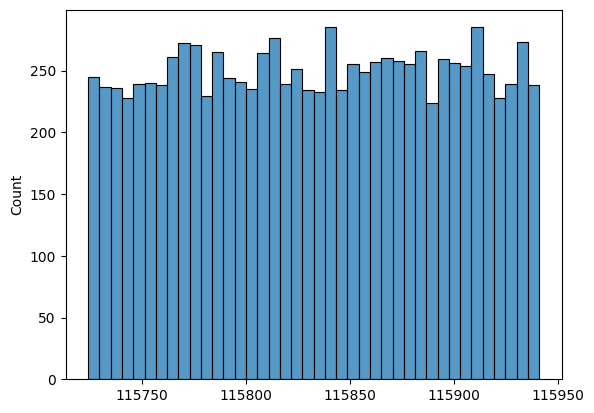

In [37]:
sns.histplot(provisions, bins=40);
provisions = pd.Series(provisions)
provisions.describe()

In [ ]:
lb = provisions.mean() - 1.96 * provisions.std(ddof=1) / np.sqrt(10000)
ub = provisions.mean() + 1.96 * provisions.std(ddof=1) / np.sqrt(10000)
print(f'95% confidence interval is {lb} and {ub}')
print(f'This corresponds to {lb / sum(oot.zeroBalanceRemovalUpb)} and {ub / sum(oot.zeroBalanceRemovalUpb)}')

95% confidence interval is 115832.1795059616 and 115834.62049403839
This corresponds to 0.0018782727841462445 and 0.0018783123659057402
